In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from process_pdfs import results_dir
from process_csvs import process_csvs

In [2]:
data = process_csvs(results_dir)
# measurements only valid between 5.1 17:30 and 28.01 18:30
data = data[('2022-01-05 17:30:00' <= data['Time']) & (data['Time'] <= '2022-01-28 18:30:00')]
data = data.drop(columns=['DEWI']) # DEWI = dewpoint indoor = Taupunkt Innenraum
data.head()

,Time,Temp,Hum
28,2022-01-05 17:30:00,18.7,57
29,2022-01-05 18:00:00,18.4,54
30,2022-01-05 18:30:00,17.7,52
31,2022-01-05 19:00:00,21.2,58
32,2022-01-05 19:30:00,21.2,59


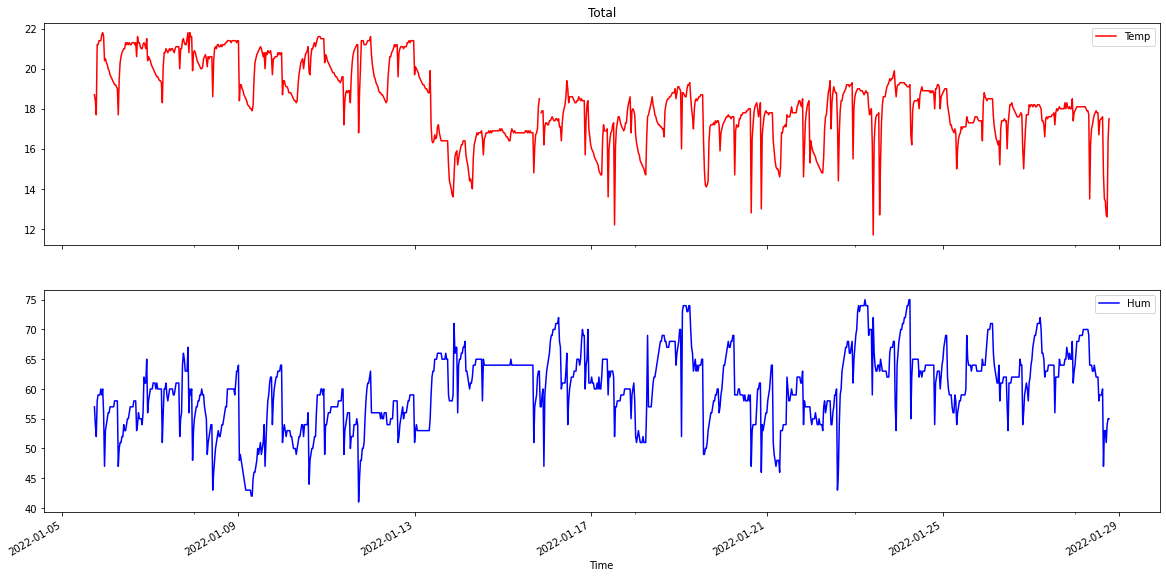

In [3]:
def plot_data(d, title=''):
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(20,10))
    ax1.set_title(title)
    d.plot(x='Time', y='Temp', ax=ax1,color='r')
    d.plot(x='Time', y='Hum', ax=ax2, color='b')
    
plot_data(data, title='Total')

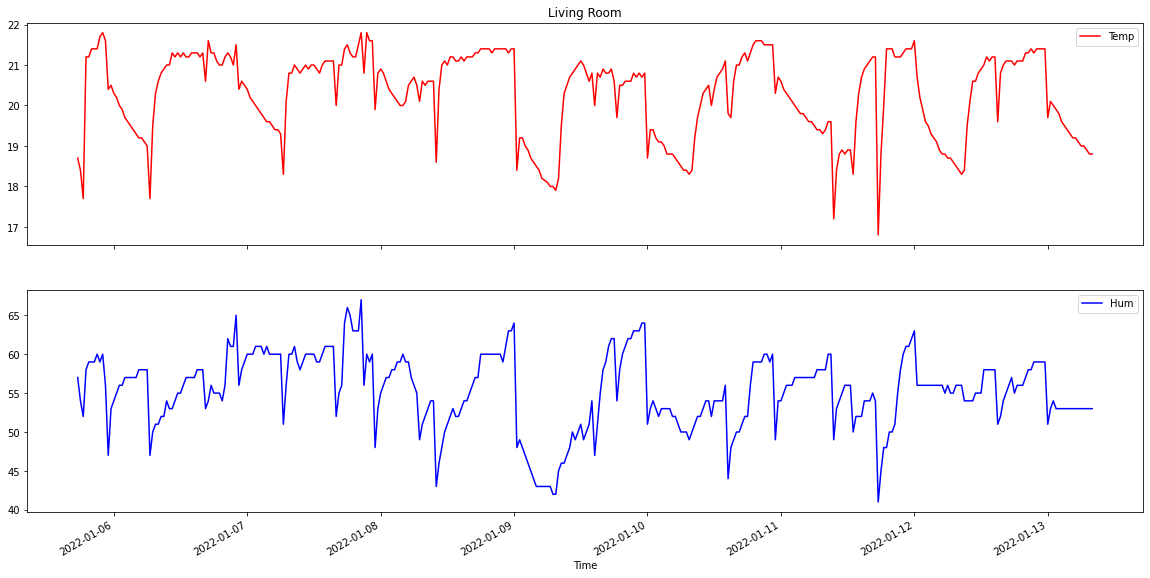

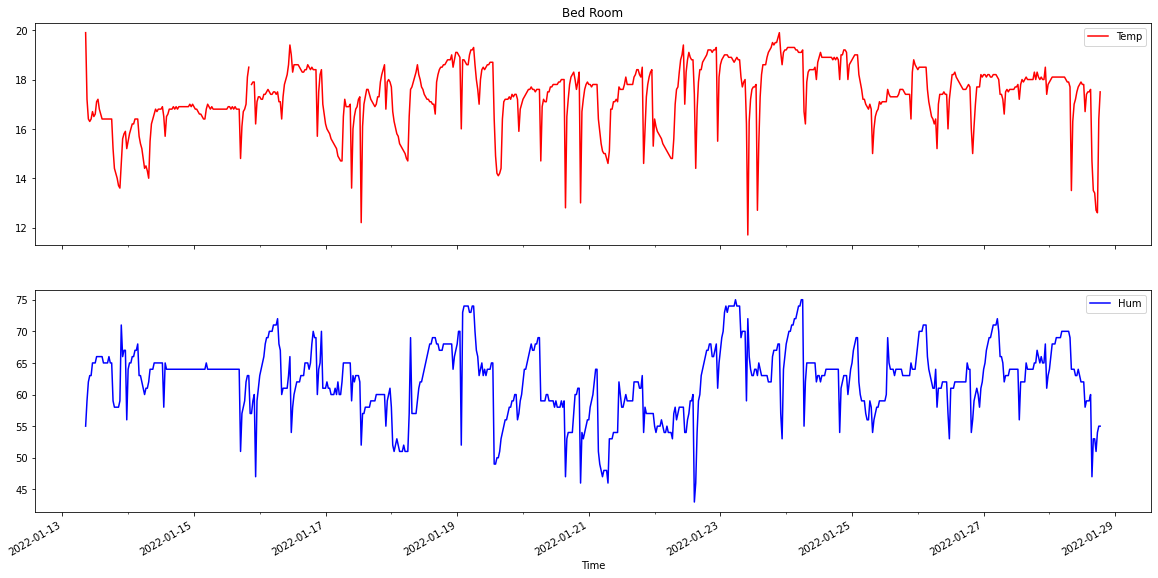

In [7]:
mask_bed_room = '2022-01-13 08:30:00' <= data['Time']
mask_living_room = np.logical_not(mask_bed_room)
data_bed = data[mask_bed_room]
data_living = data[mask_living_room]
plot_data(data_living, title='Living Room')
plot_data(data_bed, title='Bed Room')

In [8]:
data_living.describe()

,Temp,Hum
count,366.000000,366.000000
mean,20.292896,55.273224
std,1.031373,4.748663
min,16.800000,41.000000
25%,19.500000,53.000000
50%,20.600000,56.000000
75%,21.200000,59.000000
max,21.800000,67.000000


In [9]:
data_bed.describe()

,Temp,Hum
count,739.000000,740.000000
mean,17.365088,62.389189
std,1.298049,5.466829
min,11.700000,43.000000
25%,16.800000,59.000000
50%,17.600000,63.000000
75%,18.300000,65.000000
max,19.900000,75.000000


In [27]:
data['Temp_prev'] = data['Temp'].shift(1)
data['Temp_diff'] = data['Temp'] - data['Temp_prev']
data['airing'] = data['Temp_diff'] < -0.5
data[data['airing']]

,Time,Temp,Hum,Temp_prev,Temp_diff,airing
30,2022-01-05 18:30:00,17.7,52,18.4,-0.7,True
39,2022-01-05 23:00:00,20.4,47,21.6,-1.2,True
54,2022-01-06 06:30:00,17.7,47,19.0,-1.3,True
74,2022-01-06 16:30:00,20.6,53,21.3,-0.7,True
86,2022-01-06 22:30:00,20.4,56,21.5,-1.1,True
...,...,...,...,...,...,...
1113,2022-01-28 08:00:00,13.5,64,17.7,-4.2,True
1123,2022-01-28 13:00:00,16.7,58,17.8,-1.1,True
1128,2022-01-28 15:30:00,14.7,47,17.6,-2.9,True
1129,2022-01-28 16:00:00,13.5,53,14.7,-1.2,True


In [28]:
data_airing = data[data['airing']]
len(data_airing) / 23

3.5217391304347827

In [30]:
pd.set_option('display.max_rows', 100)
print(data_airing)

                    Time  Temp  Hum  Temp_prev  Temp_diff  airing
30   2022-01-05 18:30:00  17.7   52       18.4       -0.7    True
39   2022-01-05 23:00:00  20.4   47       21.6       -1.2    True
54   2022-01-06 06:30:00  17.7   47       19.0       -1.3    True
74   2022-01-06 16:30:00  20.6   53       21.3       -0.7    True
86   2022-01-06 22:30:00  20.4   56       21.5       -1.1    True
102  2022-01-07 06:30:00  18.3   51       19.3       -1.0    True
121  2022-01-07 16:00:00  20.0   52       21.1       -1.1    True
131  2022-01-07 21:00:00  20.8   56       21.8       -1.0    True
135  2022-01-07 23:00:00  19.9   48       21.6       -1.7    True
157  2022-01-08 10:00:00  18.6   43       20.6       -2.0    True
186  2022-01-09 00:30:00  18.4   48       21.4       -3.0    True
214  2022-01-09 14:30:00  20.0   47       20.8       -0.8    True
222  2022-01-09 18:30:00  19.7   54       20.6       -0.9    True
233  2022-01-10 00:00:00  18.7   51       20.8       -2.1    True
262  2022-